In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
void_data_85 = pd.read_csv('../py/void_SDSS_85.csv')
void_data_90 = pd.read_csv('../py/void_SDSS_90.csv')
void_data_tcw = pd.read_csv('../py/void_random_001_fof_xyz_mass_200Mpc512.txt')

[]

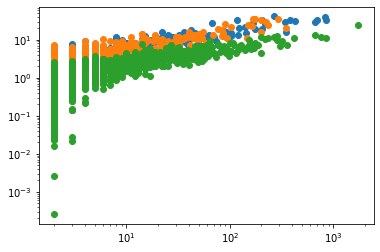

In [79]:
plt.scatter(void_data_85['N'], void_data_85['SIGMA_R'])
plt.scatter(void_data_90['N'], void_data_90['SIGMA_R'])
plt.scatter(void_data_tcw['N'], void_data_tcw['SIGMA_R'])

plt.loglog()

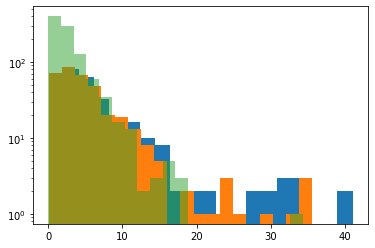

In [80]:
ii = void_data_85['N']>0
_ = plt.hist(void_data_85['SIGMA_R'][ii], log=True, bins=20)

ii = void_data_90['N']>0
_ = plt.hist(void_data_90['SIGMA_R'][ii], log=True, bins=20)

ii = void_data_tcw['N']>0
_ = plt.hist(void_data_tcw['SIGMA_R'][ii]/0.7, log=True, bins=20, alpha=0.5)

In [88]:
n_points = len(void_data_tcw)
eigen_1 = np.ones((n_points,3))
for i in range(n_points):
    eigen_1[i] = np.fromstring(void_data_tcw['EIGEN_1'][i][1:-1], sep=' ')

np.array(void_data_90['EIGEN_1'][0])

array('[-0.52494277  0.48359495  0.70040775]', dtype='<U37')

(array([27., 26., 30., 26., 23., 27., 23., 37., 25., 31.]),
 array([4.5581963e-04, 1.0035787e-01, 2.0025992e-01, 3.0016197e-01,
        4.0006402e-01, 4.9996607e-01, 5.9986812e-01, 6.9977017e-01,
        7.9967222e-01, 8.9957427e-01, 9.9947632e-01]),
 <BarContainer object of 10 artists>)

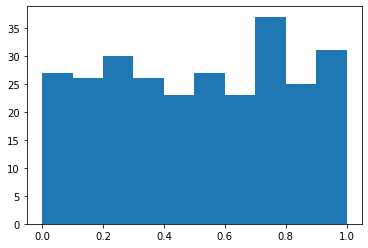

In [96]:
ii = void_data_tcw['N']>10
plt.hist(np.abs(eigen_1[ii,2]))

In [61]:
eigen_1

array([[-0.52494277,  0.48359495,  0.70040775],
       [ 0.8232015 ,  0.11393934, -0.55619881],
       [-0.91474094,  0.39867984,  0.06560029],
       ...,
       [ 0.64258803, -0.53058686, -0.55277319],
       [ 0.76616833, -0.60176452, -0.22553392],
       [ 0.69145939,  0.35065457, -0.63160533]])